## 3.6 Lab: Linear Regression

### 3.6.1 Libraries

Instead of the MASS and ISLR library in R, we will use Python packages like the following.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import statsmodels.formula.api as smf     # for R-style formula

In [9]:
# a function for residual plot!

def plotResidue(pred, resid):
    """
    inputs: 
        pred - predicted values
        resid - residuals
    """
    
    import seaborn as sns

    res=sns.regplot(pred, resid, lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
    XLIM=res.axes.xaxis.get_data_interval()
    #res.axes.hlines(0,XLIM[0], XLIM[1], linestyles='dotted')
    plt.hlines(0,XLIM[0], XLIM[1], linestyles='dotted')
    plt.xlabel('fitted values')
    plt.ylabel('residuals')
    plt.title('Residuals vs. fitted')


#### The Boston data set

*Housing Values in Suburbs of Boston*

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

* crim: per capita crime rate by town.

* zn: proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: proportion of non-retail business acres per town.

* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: nitrogen oxides concentration (parts per 10 million).

* rm: average number of rooms per dwelling.

* age: proportion of owner-occupied units built prior to 1940.

* dis: weighted mean of distances to five Boston employment centres.

* rad: index of accessibility to radial highways.

* tax: full-value property-tax rate per \$10,000.

* ptratio: pupil-teacher ratio by town.

* black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat: lower status of the population (percent).

* medv: median value of owner-occupied homes in \$1000s.

Source
* Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

* Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
# load data
Boston = pd.read_table("data/Boston.csv", sep=',')   # it's saved under data folder
print(Boston.shape)  # 506 rows and 14 columns
Boston.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [83]:
# descriptions of each column
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 3.6.2 Simple Linear Regression

Let's use Ordinary Least Squares in statsmodels package.
Example code is [here](http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html)


In [13]:
Boston.columns    # names(Boston) in R

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [24]:
# OLS from statmodels http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
lm = smf.ols(formula='medv ~ lstat', data=Boston)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 05 Feb 2018   Prob (F-statistic):           5.08e-88
Time:                        23:08:31   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print('Parameters: ', lm_fit.params)         # coef(lm.fit) in R
print('R2: ', lm_fit.rsquared)

Parameters:  Intercept    34.553841
lstat        -0.950049
dtype: float64
R2:  0.544146297586


In [34]:
# confidence interval 
# confint(lm.fit) in R
lm_fit.conf_int(alpha=0.05)      # 95% confidence interval

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [55]:
# prediction
X_new = pd.DataFrame({'lstat':[5,10,15]})
lm_fit.predict(X_new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [56]:
# prediction with confidence interval
# https://stackoverflow.com/questions/32593522/return-std-and-confidence-intervals-for-out-of-sample-prediction-in-statsmodels
pred = lm_fit.get_prediction(X_new)
pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


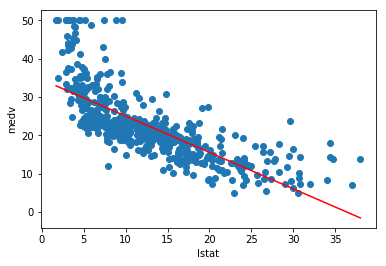

In [60]:
# scatter plot of the data
plt.scatter(Boston.lstat, Boston.medv)  

# plot estimated linear model
X = pd.DataFrame({'lstat':[Boston.lstat.min(), Boston.lstat.max()]})
Y_pred = lm_fit.predict(X)
plt.plot(X, Y_pred, c='red')
plt.xlabel("lstat")
plt.ylabel("medv")


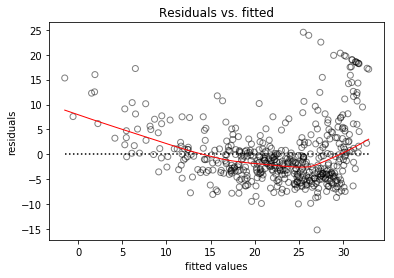

In [109]:
# let's check residuals!
#plt.scatter(lm_fit.predict(), lm_fit.resid)
# lm_fit.resid.describe()  

# better plot 
plotResidue(lm_fit.predict(), lm_fit.resid)  # this function is defined above

### 3.6.3 Multiple Linear Regression

In [114]:
# use lstat and age as predictors
lm = smf.ols('medv ~ lstat+age', data=Boston)     # model
lm_fit = lm.fit()   # fit the model
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 06 Feb 2018   Prob (F-statistic):           2.98e-88
Time:                        01:30:22   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

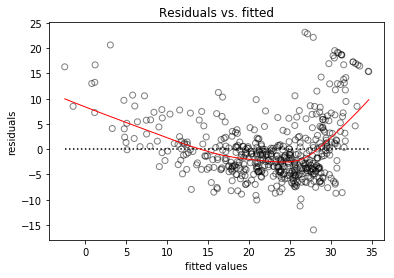

In [115]:
# check residual plot
plotResidue(lm_fit.predict(), lm_fit.resid)  # this function is defined above

In [116]:
# Use all but medv as predictors  (. keyword does not work in statsmodels)
columns_selected = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv ~ " + columns_selected
my_formula

'medv ~ age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

In [118]:
lm = smf.ols(formula = my_formula, data=Boston)
lm_fit = lm.fit()
lm_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 06 Feb 2018   Prob (F-statistic):          6.72e-135
Time:                        01:31:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
age            0.0007      0.013      0.052      0.958      -0.025       0.027
black          0.0093      0.003      3.467      0.001       0.004       0.015
chas           2.6867      0.862      3.118      0.002       0.994       4.380
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
rad            0.3060      0.066      4.613      0.000       0.176       0.436
rm             3.8099      0.418      9.116      0.000       2.989       4.631
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

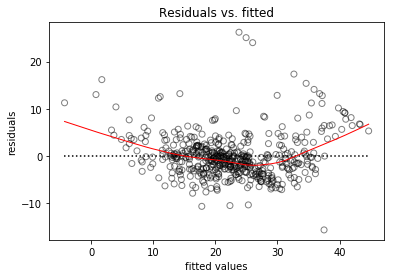

In [119]:
# check residual plot
plotResidue(lm_fit.predict(), lm_fit.resid)  # this function is defined above

### 3.6.4 Interaction Terms

In [120]:
lm = smf.ols('medv ~ lstat*age', data=Boston)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 06 Feb 2018   Prob (F-statistic):           4.86e-88
Time:                        01:31:45   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

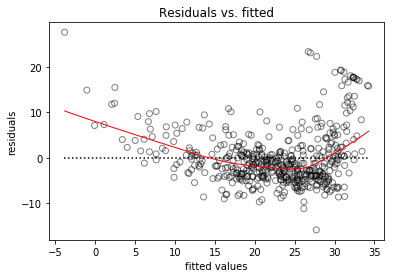

In [121]:
# check residual plot
plotResidue(lm_fit.predict(), lm_fit.resid)  # this function is defined above

### 3.6.5 Non-linear Transformation of the Predictors

In [7]:
lm2 = smf.ols('medv ~ lstat + I(lstat**2)', data=Boston)
#lm2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=Boston)   # alternative form
lm2_fit = lm2.fit()
lm2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 06 Feb 2018   Prob (F-statistic):          1.56e-112
Time:                        03:41:40   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

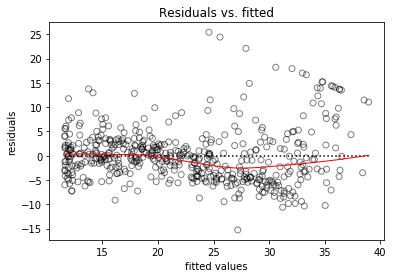

In [10]:
# check residual plot
plotResidue(lm2_fit.predict(), lm2_fit.resid)  # this function is defined above
# looks better!

In [124]:
# ANOVA to compare models

import statsmodels.api as sm

lm_fit = smf.ols('medv ~ lstat', data=Boston).fit() # previous model with 1st order term only

table = sm.stats.anova_lm(lm_fit, lm2_fit, typ=1)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


/Users/yyoo/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yyoo/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yyoo/Library/Python/3.6/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [13]:
# ADD up to 5th order polynomials
lm5 = smf.ols('medv ~ lstat + I(lstat**2) + I(lstat**3) + I(lstat**4) + I(lstat**5)', data=Boston)
lm5_fit = lm5.fit()
lm5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1194.
Date:                Tue, 06 Feb 2018   Prob (F-statistic):          1.14e-275
Time:                        03:48:36   Log-Likelihood:                -1685.7
No. Observations:                 506   AIC:                             3381.
Df Residuals:                     501   BIC:                             3403.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lstat            15.8973      0.458     34.702      0.000      14.997      16.797
I(lstat ** 2)    -2.6024      0.111    -23.444      0.000      -2.820      -2.384
I(lstat ** 3)     0.1675      0.009     18.287      0.000       0.150       0.185
I(lstat ** 4)    -0.0047      0.000    -15.357      0.000      -0.005      -0.004
I(lstat ** 5)  4.851e-05    3.6e-06     13.462      0.000    4.14e-05    5.56e-05
==============================================================================
Omnibus:                      103.736   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.192
Skew:                           1.128   Prob(JB):                     1.68e-45
Kurtosis:                       5.165   Cond. No.                     1.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

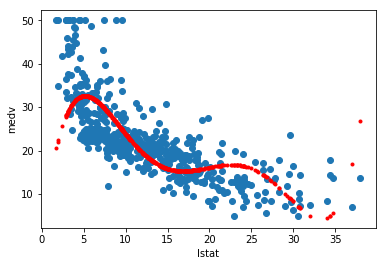

In [23]:
plt.scatter(Boston.lstat, Boston.medv)
plt.plot(Boston.lstat,lm5_fit.predict(), '.r')
plt.xlabel('lstat')
plt.ylabel('medv')
# too wiggly

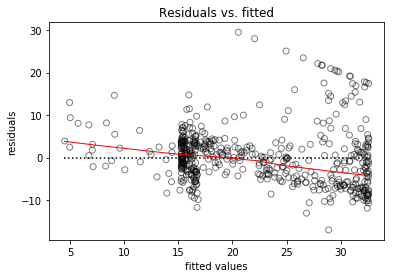

In [25]:
# check residual plot
plotResidue(lm5_fit.predict(), lm5_fit.resid)  # this function is defined above
# looks worse
# larger values are under-estimated
# smaller values are over-estimated

In [26]:
## let's try log
# ADD up to 5th order polynomials
lmLog = smf.ols('medv ~ np.log(rm)', data=Boston)
lmLog_fit = lmLog.fit()
lmLog_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Tue, 06 Feb 2018   Prob (F-statistic):           1.22e-64
Time:                        03:56:10   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

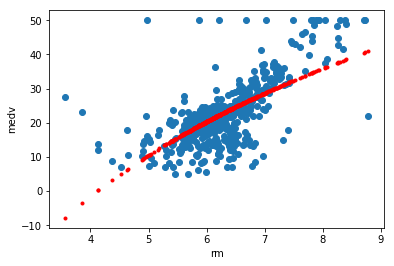

In [28]:
plt.scatter(Boston.rm, Boston.medv)
plt.plot(Boston.rm,lmLog_fit.predict(), '.r')
plt.xlabel('rm')
plt.ylabel('medv')

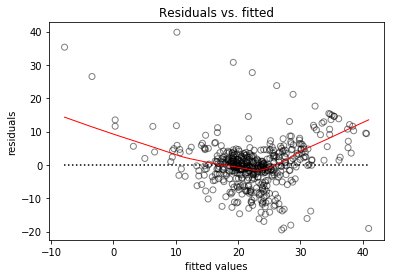

In [30]:
# check residual plot
plotResidue(lmLog_fit.predict(), lmLog_fit.resid)  # this function is defined above
# not good
# small and large values are under-estimated